In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import pickle

In [2]:
df = pd.read_csv("../input/cancer.csv")

In [3]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
df.drop(columns = ["id","Unnamed: 32"],inplace = True)

In [5]:
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [6]:
dfben = df.loc[df.diagnosis == "B",:]
dfmal = df.loc[df.diagnosis == "M",:]

In [7]:
dfben.shape

(357, 31)

In [8]:
dfmal.shape

(212, 31)

In [9]:
dfbensample = dfben.sample(n=212,random_state=42)

In [10]:
df = pd.concat([dfbensample,dfmal])

In [11]:
x = df.iloc[:,1:]
y = df["diagnosis"]

In [12]:
y.value_counts()

diagnosis
B    212
M    212
Name: count, dtype: int64

In [13]:
x_mean = x.iloc[:,:10]

In [14]:
x_mean

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
395,14.060,17.18,89.75,609.1,0.08045,0.05361,0.026810,0.03251,0.1641,0.05764
110,9.777,16.99,62.50,290.2,0.10370,0.08404,0.043340,0.01778,0.1584,0.07065
481,13.900,19.24,88.73,602.9,0.07991,0.05326,0.029950,0.02070,0.1579,0.05594
493,12.460,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.01149,0.1613,0.06013
136,11.710,16.67,74.72,423.6,0.10510,0.06095,0.035920,0.02600,0.1339,0.05945
...,...,...,...,...,...,...,...,...,...,...
563,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.317400,0.14740,0.2149,0.06879
564,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.243900,0.13890,0.1726,0.05623
565,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.09791,0.1752,0.05533
566,16.600,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.05302,0.1590,0.05648


<Axes: >

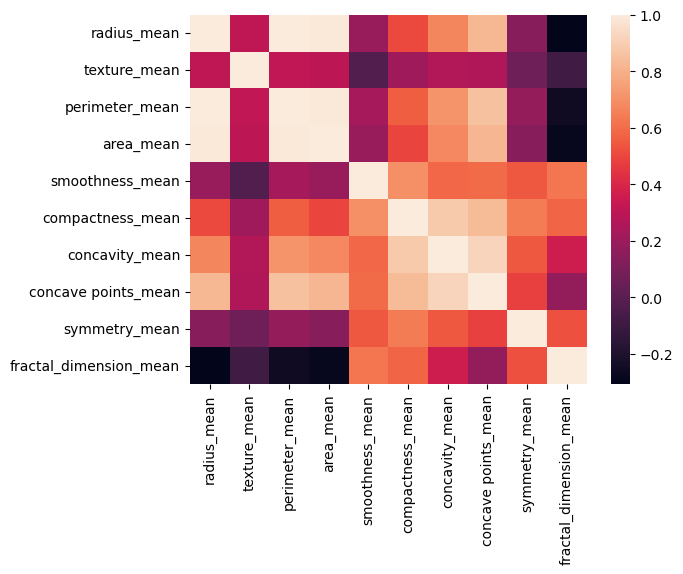

In [15]:
sns.heatmap(data=x_mean.corr())

In [16]:
x.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.310160,0.997721,0.988081,0.189601,0.504577,0.672740,0.824131,0.141487,-0.306457,...,0.966183,0.276109,0.961799,0.939116,0.127465,0.374167,0.497335,0.726803,0.139735,-0.031473
texture_mean,0.310160,1.000000,0.314764,0.301619,-0.029535,0.213825,0.265356,0.262807,0.065073,-0.084629,...,0.334459,0.902844,0.340338,0.321342,0.072451,0.250187,0.267407,0.259175,0.094849,0.092624
perimeter_mean,0.997721,0.314764,1.000000,0.986686,0.229615,0.556884,0.713213,0.853377,0.181057,-0.254437,...,0.965746,0.281498,0.967160,0.938751,0.160293,0.418037,0.535975,0.755148,0.167350,0.013158
area_mean,0.988081,0.301619,0.986686,1.000000,0.190829,0.490655,0.676824,0.819397,0.139194,-0.285005,...,0.957959,0.259772,0.954254,0.954689,0.122273,0.346974,0.479498,0.700776,0.111837,-0.038604
smoothness_mean,0.189601,-0.029535,0.229615,0.190829,1.000000,0.695635,0.586398,0.591939,0.545782,0.622370,...,0.234967,0.052082,0.265612,0.220452,0.816281,0.523978,0.509120,0.561167,0.412652,0.543451
compactness_mean,0.504577,0.213825,0.556884,0.490655,0.695635,1.000000,0.886641,0.833724,0.640477,0.573860,...,0.532788,0.237511,0.591140,0.500258,0.592604,0.866781,0.825185,0.825852,0.540898,0.672895
concavity_mean,0.672740,0.265356,0.713213,0.676824,0.586398,0.886641,1.000000,0.923391,0.542191,0.356376,...,0.678231,0.267431,0.721656,0.660933,0.483573,0.733283,0.876239,0.856732,0.424742,0.489474
concave points_mean,0.824131,0.262807,0.853377,0.819397,0.591939,0.833724,0.923391,1.000000,0.480603,0.178054,...,0.827366,0.265378,0.854729,0.801019,0.469259,0.643401,0.742335,0.905229,0.378125,0.338337
symmetry_mean,0.141487,0.065073,0.181057,0.139194,0.545782,0.640477,0.542191,0.480603,1.000000,0.520554,...,0.179347,0.093152,0.220001,0.163807,0.421848,0.515747,0.481638,0.465382,0.711040,0.471245
fractal_dimension_mean,-0.306457,-0.084629,-0.254437,-0.285005,0.622370,0.573860,0.356376,0.178054,0.520554,1.000000,...,-0.247092,-0.042419,-0.194667,-0.233607,0.531196,0.501630,0.393525,0.209680,0.379593,0.787394


In [17]:
x_mean.drop(columns=["perimeter_mean","area_mean","concave points_mean"],inplace = True)

C:\Users\sebastian\AppData\Local\Temp\ipykernel_7940\1743642716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_mean.drop(columns=["perimeter_mean","area_mean","concave points_mean"],inplace = True)


In [18]:
x_mean

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
395,14.060,17.18,0.08045,0.05361,0.026810,0.1641,0.05764
110,9.777,16.99,0.10370,0.08404,0.043340,0.1584,0.07065
481,13.900,19.24,0.07991,0.05326,0.029950,0.1579,0.05594
493,12.460,12.83,0.07372,0.04043,0.007173,0.1613,0.06013
136,11.710,16.67,0.10510,0.06095,0.035920,0.1339,0.05945
...,...,...,...,...,...,...,...
563,20.920,25.09,0.10990,0.22360,0.317400,0.2149,0.06879
564,21.560,22.39,0.11100,0.11590,0.243900,0.1726,0.05623
565,20.130,28.25,0.09780,0.10340,0.144000,0.1752,0.05533
566,16.600,28.08,0.08455,0.10230,0.092510,0.1590,0.05648


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    x_mean, y, test_size=0.3, random_state=42,stratify = y)

In [20]:
y_train.value_counts()

diagnosis
B    148
M    148
Name: count, dtype: int64

In [21]:
clf = LogisticRegression()

In [22]:
clf.fit(X_train,y_train)

LogisticRegression()

In [23]:
clf.coef_

array([[0.8649029 , 0.20916679, 0.49870675, 1.61198604, 2.12915675,
        0.73923037, 0.21942662]])

In [24]:
clf.intercept_

array([-16.98430961])

In [25]:
y_pred = clf.predict(X_test)

In [26]:
y_pred

array(['B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M'],
      dtype=object)

In [27]:
matriz = confusion_matrix(y_test, y_pred)

<Axes: >

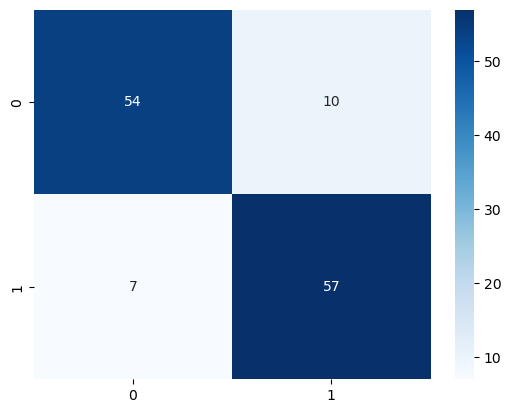

In [28]:
sns.heatmap(data = matriz, annot = True, cmap = 'Blues')

In [29]:
accuracy_score(y_test, y_pred)

0.8671875

In [30]:
recall_score(y_test, y_pred, average='weighted')

0.8671875

In [31]:
precision_score(y_test, y_pred, average='weighted')

0.8679960851480304

In [32]:
outputFile = open('../output/model.dat','wb')
pickle.dump(clf, outputFile)
outputFile.close()

In [33]:
x_mean2 = x.iloc[:,10:20]#seno, peor, y entre ellos

In [34]:
x_mean2

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
395,0.1504,1.6850,1.237,12.67,0.005371,0.01273,0.011320,0.009155,0.01719,0.001444
110,0.4030,1.4240,2.747,22.87,0.013850,0.02932,0.027220,0.010230,0.03281,0.004638
481,0.3316,0.9264,2.056,28.41,0.003704,0.01082,0.015300,0.006275,0.01062,0.002217
493,0.3276,1.4860,2.108,24.60,0.010390,0.01003,0.006416,0.007895,0.02869,0.004821
136,0.4489,2.5080,3.258,34.37,0.006578,0.01380,0.026620,0.013070,0.01359,0.003707
...,...,...,...,...,...,...,...,...,...,...
563,0.9622,1.0260,8.758,118.80,0.006399,0.04310,0.078450,0.026240,0.02057,0.006213
564,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.051980,0.024540,0.01114,0.004239
565,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.039500,0.016780,0.01898,0.002498
566,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.047300,0.015570,0.01318,0.003892


In [35]:
x_mean3 = x.iloc[:,20:30]

In [36]:
x_mean3

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
395,14.92,25.34,96.42,684.5,0.10660,0.12310,0.08460,0.07911,0.2523,0.06609
110,11.05,21.47,71.68,367.0,0.14670,0.17650,0.13000,0.05334,0.2533,0.08468
481,16.41,26.42,104.40,830.5,0.10640,0.14150,0.16730,0.08150,0.2356,0.07603
493,13.19,16.36,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028
136,13.33,25.48,86.16,546.7,0.12710,0.10280,0.10460,0.06968,0.1712,0.07343
...,...,...,...,...,...,...,...,...,...,...
563,24.29,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873
564,25.45,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115
565,23.69,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
566,18.98,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820
